# Sheet 8
Leonard Benkendorff, Dorothea Schwärzel, Sebastian Preuß

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

## 1 Projection Trick
### (a)

(500, 2)


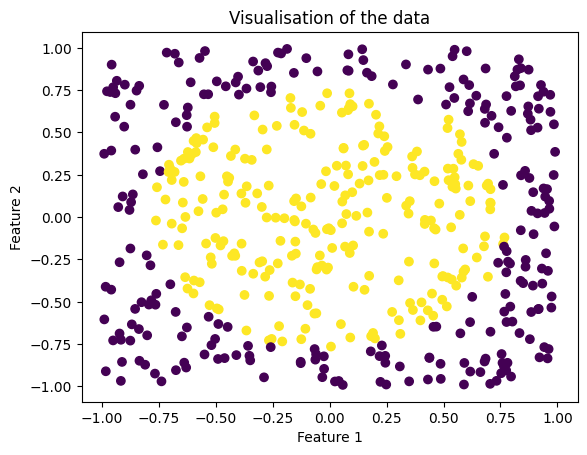

In [2]:
# Load the data
xy = np.load('data/data2d.npy')
labels = np.load('data/labels.npy')

print(xy.shape)
# TODO: Plot the data
plt.scatter(xy[:,0],xy[:,1], c=labels)
plt.title('Visualisation of the data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Accuracy: 0.558


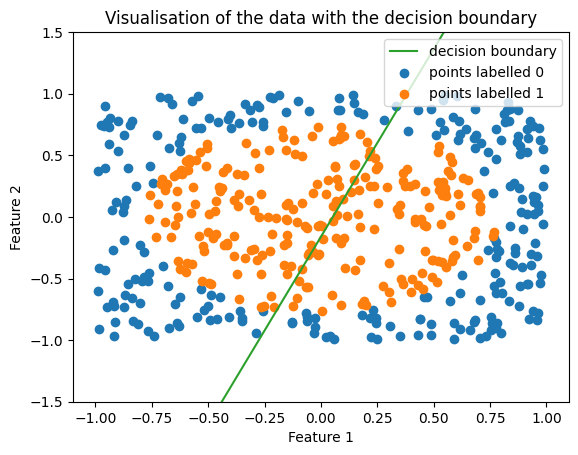

In [3]:
# TODO: fit logistic regression]
lr = LogisticRegression()
lr.fit(xy,labels)
# TODO: compute the accuracy
print('Accuracy:', lr.score(xy,labels))
# TODO: visualize the decision boundary
lr.coef_
lr.intercept_
pred = np.zeros(500)
pred[np.where((lr.coef_ @ xy.T + lr.intercept_).flatten() > 0)] = 1
x_decision = np.array([-1,1])
y_decision = -(lr.coef_[0,0]*x_decision+lr.intercept_[0])/lr.coef_[0,1]
plt.plot(x_decision, y_decision, '-', color='C2', label='decision boundary')
plt.scatter(xy[np.where(labels==0),0],xy[np.where(labels==0),1], label='points labelled 0')
plt.scatter(xy[np.where(labels==1),0],xy[np.where(labels==1),1], label='points labelled 1')
plt.title('Visualisation of the data with the decision boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim(-1.5,1.5)
plt.legend(loc='best')
plt.show()

This problem cannot (satisfactorily) be solved with a linear decision boundary in 2D. We get an accuracy of a little under $60\%$. From the scatter plot above we can see, that the decision boundary cannot approximate the data very well.

### (b)
As a nonlinear transformation, we chose the absolute value of the points, i.e. the distance to the origin.

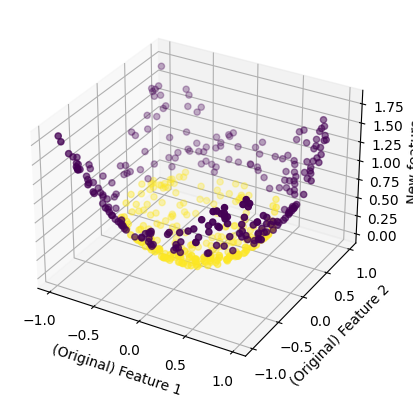

In [4]:
# TODO: Come up with a nonlinear tranformation for the third feature. Compute it and concatenate to the data.
z = xy[:,0]**2+xy[:,1]**2

# TODO: Show the enhanced data, e.g. with a 3D scatter plot 
#       (https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xy[:,0], xy[:,1], z, c=labels)

ax.set_xlabel('(Original) Feature 1')
ax.set_ylabel('(Original) Feature 2')
ax.set_zlabel('New feature')
plt.show()

In [5]:
# TODO: again, fit and evaluate logistic regression
lr = LogisticRegression()
xyz = np.hstack([xy,np.array([z]).T])
lr.fit(xyz,labels)
# TODO: compute the accuracy
print('Accuracy:', lr.score(xyz,labels))
# TODO: visualize the decision boundary
lr.coef_
lr.intercept_
pred = np.zeros(500)
pred[np.where((lr.coef_ @ xyz.T + lr.intercept_).flatten() > 0)] = 1
#print(np.sum(pred==labels))
#print(labels)

Accuracy: 0.99


The `sklearn.linear_model.LogisticRegression` computes `coef_` and `intercept_` during its `fit()` and then classifies a point $x\in\mathbb{R}^3$ as follows: Let $A=$ `coef_` $\in\mathbb{R}^{1\times3}$, $b=$ `intercept_` $\in\mathbb{R}$, then:
$$\text{prediction}(x)=
\begin{cases}
0,\quad Ax+b<0\\
1,\quad\text{otherwise.}
\end{cases}$$
Accordingly, we have a decision boundary in 3D that is a plane normal to $A$, offset by $b$.

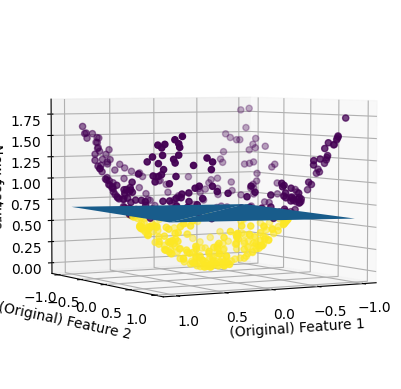

In [6]:
corners=[]
for i in range(4):
    x = (-1)**i * 1
    y = (-1 if i > 1 else 1) * 1
    coef = lr.coef_[0]
    corners.append(np.array([x,y,(-lr.intercept_[0]+coef[0]*x+coef[1]*y)/coef[2]]))
#print(corners)

corners = np.array(corners)
ax = plt.gcf().add_subplot(projection='3d')
#print(corners[0,:])
a=np.array([corners[:,0]]).T
b=np.array([corners[:,1]]).T
c=np.array([corners[:,2]]).T
ax.scatter(xy[:,0], xy[:,1], z, c=labels)
ax.plot_trisurf(corners[:,0],corners[:,1],corners[:,2])
#ax.scatter(xy[:,0], xy[:,1], z, c=labels)

#print(corners[:,2])
#print(z[np.where(labels==0)])
#print(z[np.where(labels==1)])

ax.set_xlabel('(Original) Feature 1')
ax.set_ylabel('(Original) Feature 2')
ax.set_zlabel('New feature')
ax.view_init(elev=3.6, azim=60)
#plt.show()

Pyplot seems to draw the points over the plane, i.e. points 'behind' the plane (from the point of view given in the graph) are not hidden, therefore it is kind of hard, to find a proper perspective which highlights the decision plane...

### (c) How could this be solved using a 1-layer MLP?

The classification basically only occurs along the third axis, i.e. our new nonlinear feature. In a 1-layer MLP, this problem could hence be solved by letting the hidden layer compute the absolute value of the inputs, scaling this appropriately and adding an offset.

## Exercise 2 Training of an MLP

### a)
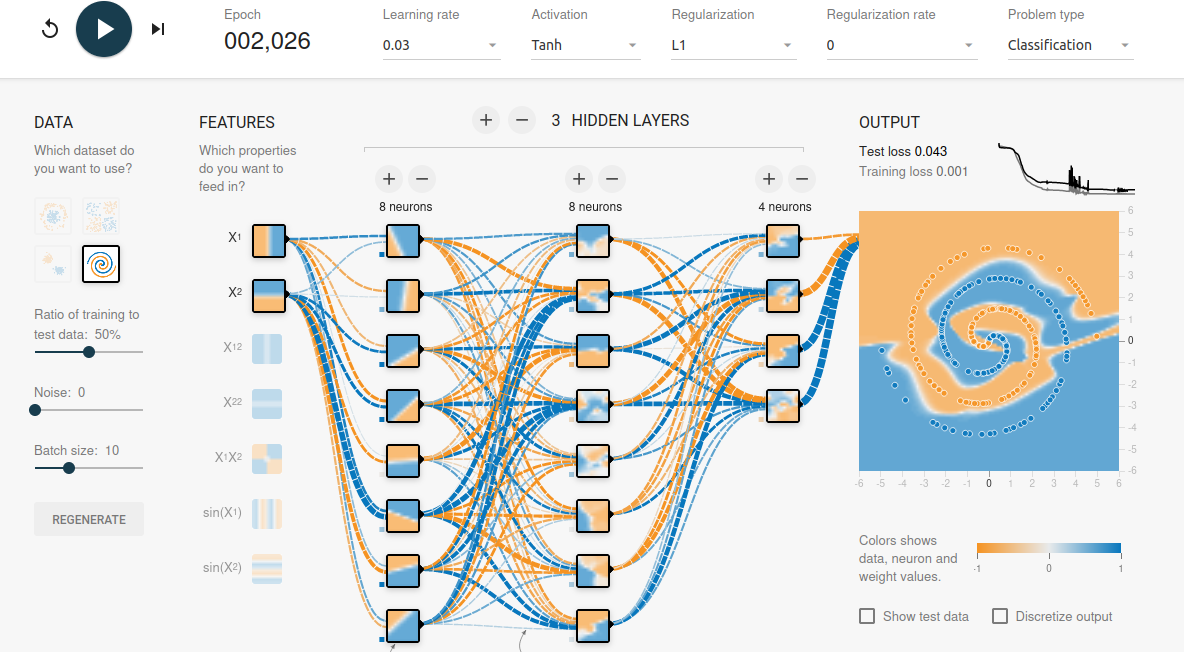

**Discussion:** We chose three layers, where the first layer has the maximum amount of neurons to be able to get a good partition of the space along the feature axes $x_1$ and $x_2$. After this we added two more layers, one with the maximum and one with two neurons to make overlaps of the partitioned space to properly learn the spiral.

### b)
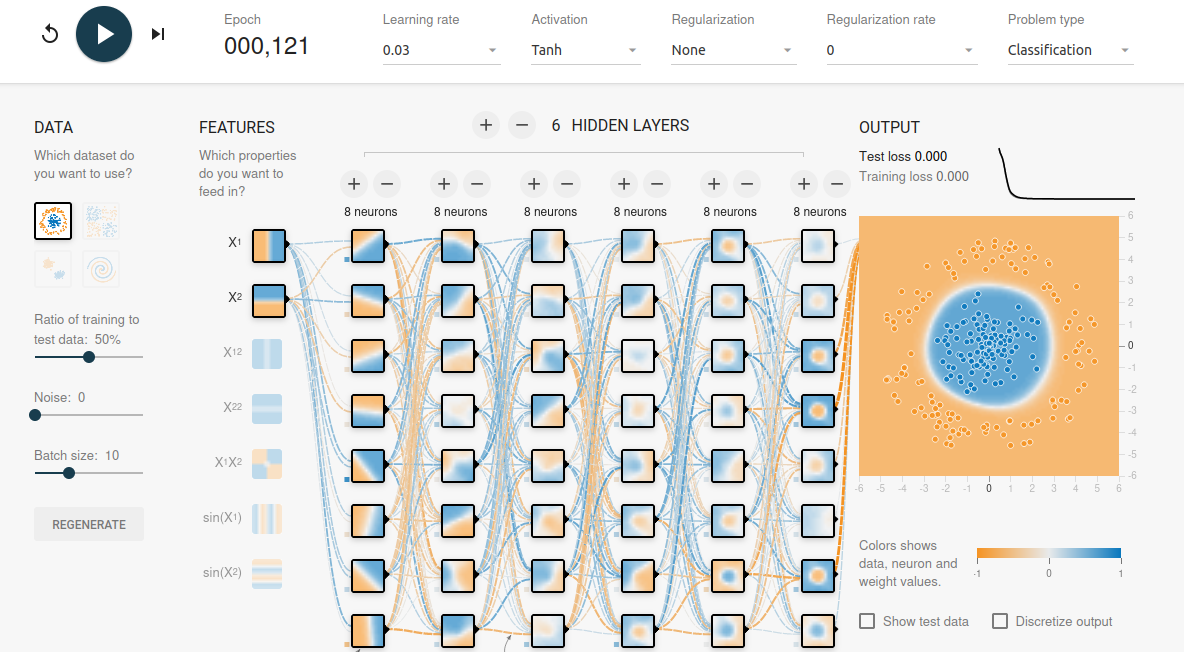
The large network without regularization.

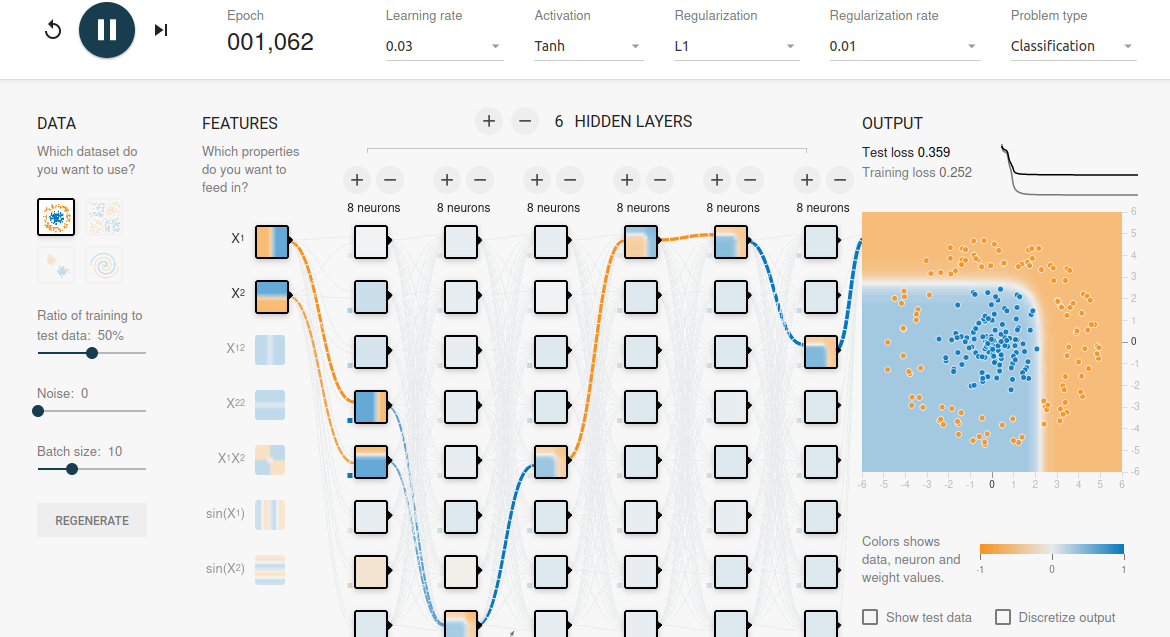
The large network with L1 regularization.

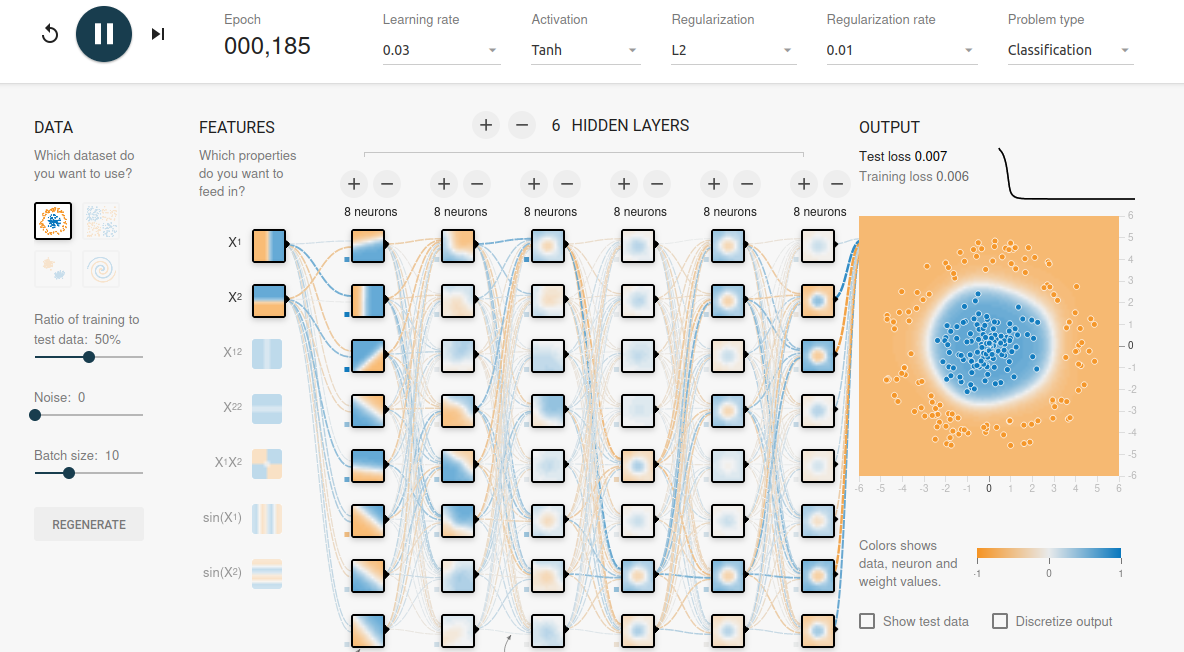
The large network with L2 regularization.

**Discussion:** We observe:
 - The larger the regularization strength, the longer the training gets, at some point, the network cannot learn the structure any more
 - For L1 regularization, the weights are heavily suppressed, only a few connections are made.
 - For L2 regularization, all weights are suppressed by the same amount.

### c)
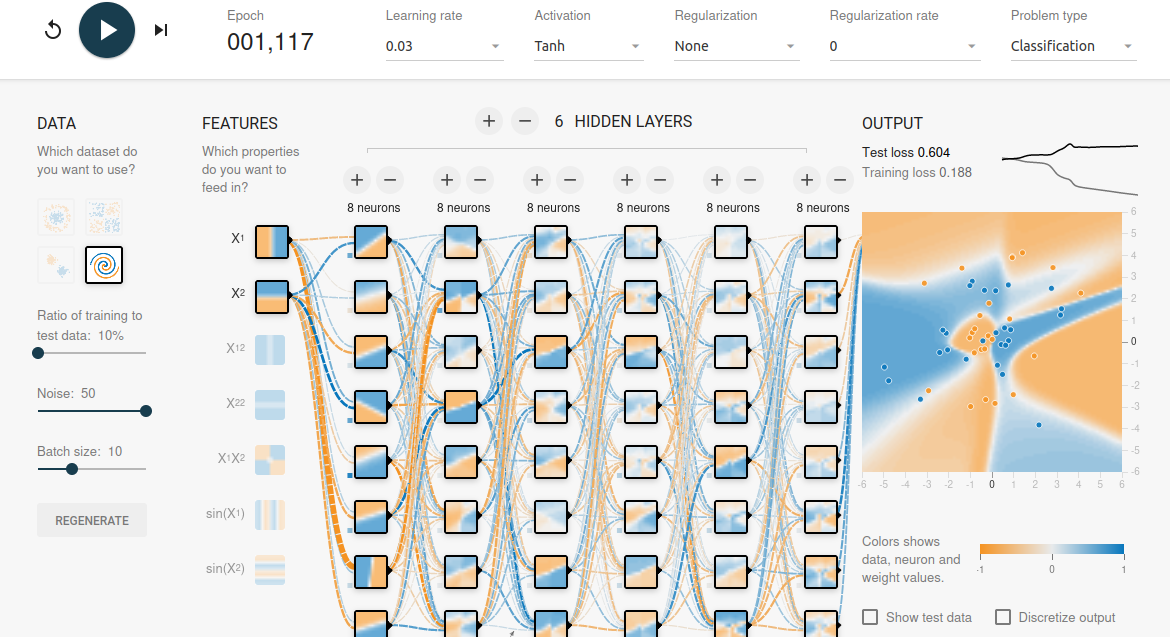

**Discussion:** We see that for the spiral dataset with maximum noise and little training data we get a more or less random pattern of points. With the largest network size, this pattern is learned and hence the test error stays at over 50% even after a long amount of training.

## 3 Reverse mode automatic differentiation

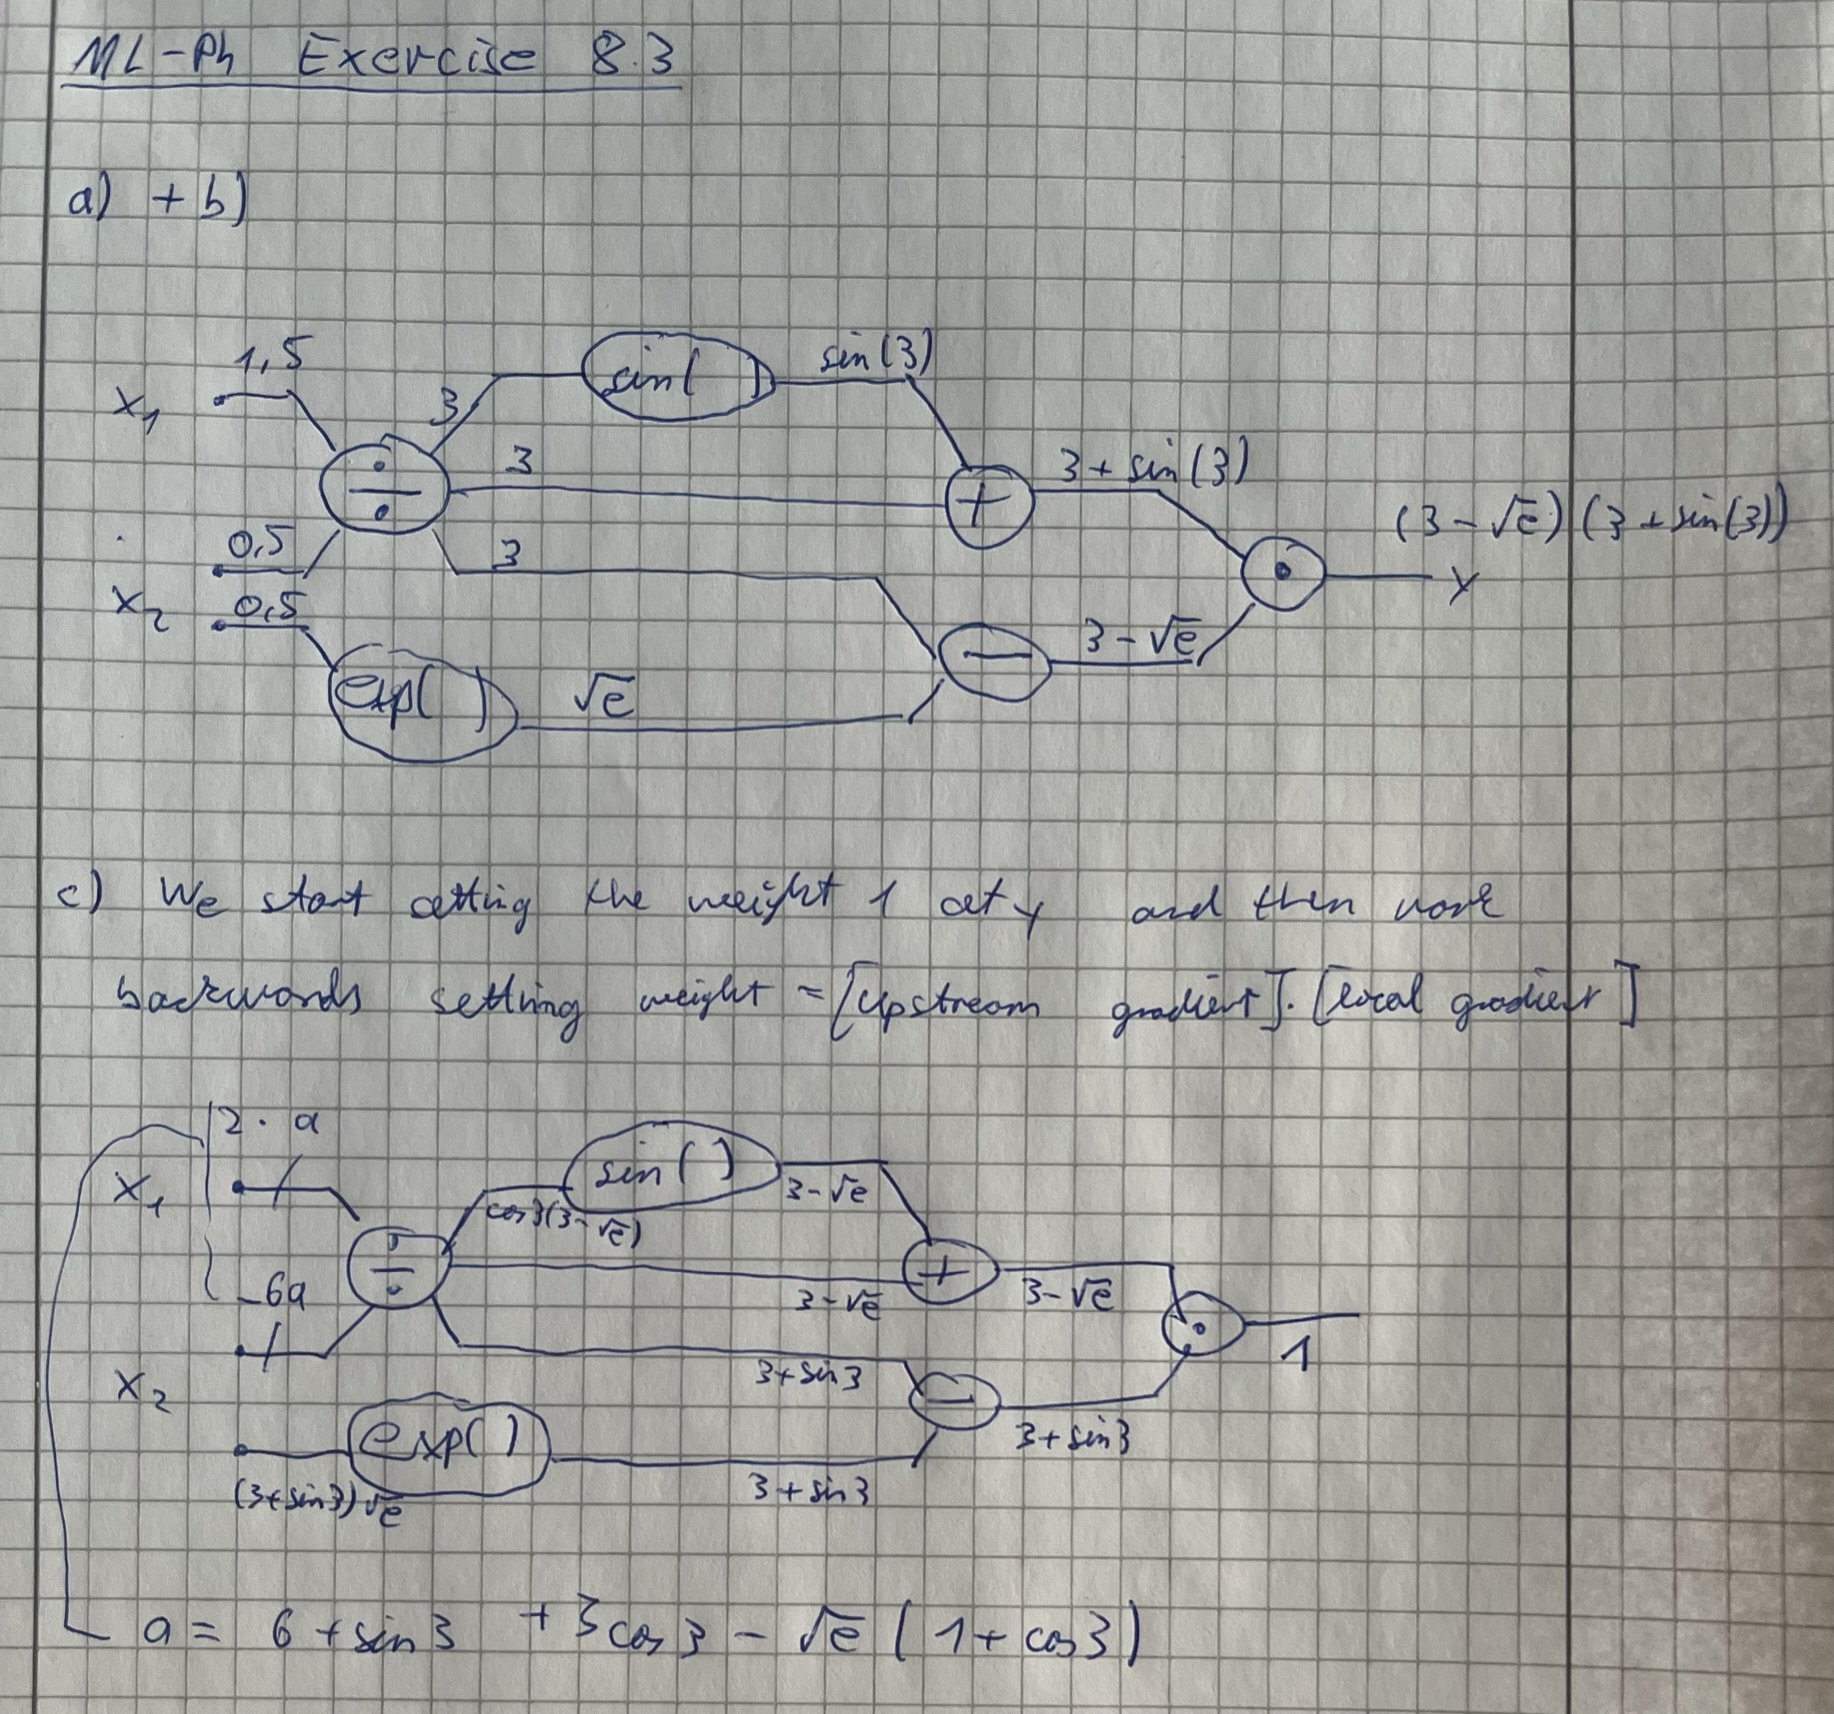